### Processamento e visualização de dados
#### Aluno : Yago David Pimenta RA : 800273



In [2]:
! pip install vega_datasets


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from vega_datasets import data

In [4]:
df = data.cars()
df

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA
...,...,...,...,...,...,...,...,...,...
401,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,1982-01-01,USA
402,vw pickup,44.0,4,97.0,52.0,2130,24.6,1982-01-01,Europe
403,dodge rampage,32.0,4,135.0,84.0,2295,11.6,1982-01-01,USA
404,ford ranger,28.0,4,120.0,79.0,2625,18.6,1982-01-01,USA


Sobre o dataset , eu preferi pegar um próprio da lib vega_datasets para facilitar , nesse caso irei falar sobre carros , basta ver que ele é n-dimensional portanto irá dar certinho no propósito desse trabalho . 

In [5]:
#irei escolher os atributos que irei considerar na minha visualização
atributos = [ 'Displacement','Cylinders', 'Horsepower',
           'Miles_per_Gallon','Acceleration']

In [6]:

#Irei fazer uma normalização para concentrar os valores entre 0 e 100
new_max = 100
new_min = 0
new_range = new_max - new_min

#para isso fiz uma transformação linear simples
for atributo in atributos:
  max_val = df[atributo].max()
  min_val = df[atributo].min()
  val_range = max_val - min_val
  df[atributo + '_normalizado'] = df[atributo].apply(
      lambda x: (((x - min_val) * new_range) / val_range) + new_min)

In [7]:
df['Car Model'] = df.apply(lambda row: '{} {}'.format(row.Name, row.Year.year), axis=1)
#vou criar outro dataframe somente com as informações importantes
dft = df.loc[:, ['Car Model','Displacement_normalizado','Cylinders_normalizado',
                 'Horsepower_normalizado', 'Miles_per_Gallon_normalizado',
                 'Acceleration_normalizado']]

dft.rename(columns={
    'Displacement_normalizado': 'Displacement',
    'Cylinders_normalizado':'Cylinders',
    'Horsepower_normalizado': 'Horsepower',
    'Miles_per_Gallon_normalizado': 'MPG',
    'Acceleration_normalizado': 'Acceleration',

}, inplace=True)
#setando index
dft.set_index('Car Model', inplace=True)


dft


,Displacement,Cylinders,Horsepower,MPG,Acceleration
Car Model,,,,,
chevrolet chevelle malibu 1970,61.757106,100.0,45.652174,23.936170,23.809524
buick skylark 320 1970,72.868217,100.0,64.673913,15.957447,20.833333
plymouth satellite 1970,64.599483,100.0,56.521739,23.936170,17.857143
amc rebel sst 1970,60.981912,100.0,56.521739,18.617021,23.809524
ford torino 1970,60.465116,100.0,51.086957,21.276596,14.880952
...,...,...,...,...,...
ford mustang gl 1982,18.604651,20.0,21.739130,47.872340,45.238095
vw pickup 1982,7.493540,20.0,3.260870,93.085106,98.809524
dodge rampage 1982,17.312661,20.0,20.652174,61.170213,21.428571


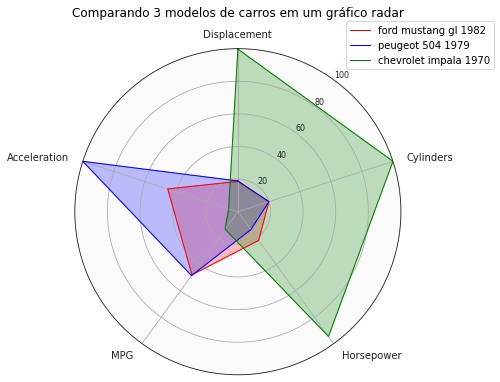

In [12]:
#setando os atributos que iremos plotar os gráficos
labels = ['Displacement', 'Cylinders','Horsepower', 'MPG', 'Acceleration']

#vai ser quantas "dimensões estamos visualizando"
num_vars = len(labels)

#Agora vamos fazer o circulo
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))


#eu quero criar uma função para ficar mais fácil analisar o modelo de carro que quero
def add_to_radar(car_model, color):
  values = dft.loc[car_model].tolist()
  values += values[:1]
  ax.plot(angles, values, color=color, linewidth=1, label=car_model)
  ax.fill(angles, values, color=color, alpha=0.25)

#Vamos analisar  o ford mustang gl 1982 , peugeuot 504 1979 e chevrolet impala 1970
add_to_radar('ford mustang gl 1982','red')
add_to_radar('peugeot 504 1979','blue')
add_to_radar('chevrolet impala 1970','green')

#aqui eu seto os eixos como se fossem um relógio
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles), labels)


#desenhando o circulo
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')
#setando o limite
ax.set_ylim(0, 100)
#organizando a posição
ax.set_rlabel_position(180 / num_vars)

ax.tick_params(colors='#222222')
ax.tick_params(axis='y', labelsize=8)
#escolhendo cor
ax.grid(color='#AAAAAA')
ax.spines['polar'].set_color('#222222')
ax.set_facecolor('#FAFAFA')


ax.set_title('Comparando 3 modelos de carros em um gráfico radar', y=1.08)


ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

f ) Coloque conclusões da atividade feita como comentário: a) o que você aprendeu com esta atividade? b) como aprimorar o que você já fez?

a) Eu desconhecia a sintaxe para plotar o gráfico do tipo radar , logo foi necessário muito estudo para aprender essa técnica , além de selecionar bem os atributos que eu gostaria de representar .

b)Para aprimorar esse tipo de gráfico é necessário ressaltar que existe atributos que são bons serem pequenos como por exemplo MPG que é o galões gastos por milhas e tem outros como Acceleration que o ideal é ser grande . Portanto para induzir ao leitor uma análise melhor desse gráfico deveria constar essas informações secundárias .